<a href="https://colab.research.google.com/github/kasthuri-22/stock-market-analysis/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
df=pd.read_csv('car_Dekho_DA.csv',index_col=0)
df.info()
df.head(5)
df.isnull().sum()
df.drop_duplicates(inplace=True)
df.to_csv('car_Dekho_csv',index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.3   299 non-null    int64  
 1   Unnamed: 0.2   299 non-null    int64  
 2   Unnamed: 0.1   299 non-null    int64  
 3   Unnamed: 0     299 non-null    int64  
 4   Car_Name       299 non-null    object 
 5   Year           299 non-null    int64  
 6   Selling_Price  299 non-null    float64
 7   Present_Price  299 non-null    float64
 8   Kms_Driven     299 non-null    int64  
 9   Fuel_Type      299 non-null    object 
 10  Seller_Type    299 non-null    object 
 11  Transmission   299 non-null    object 
 12  Owner          299 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 32.7+ KB


here we are facing issues of unnamed columns which is carbage columns so we should delete it

In [34]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.to_csv('car_Dekho_cleaned.csv', index=False)

In [30]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
df['Fuel_Type'].value_counts()
df['Seller_Type'].value_counts()
df['Transmission'].value_counts()

,count
Transmission,
Manual,260
Automatic,39


visualization

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


1.histplot (Distribution of Numerical Data)
Selling Price Distribution

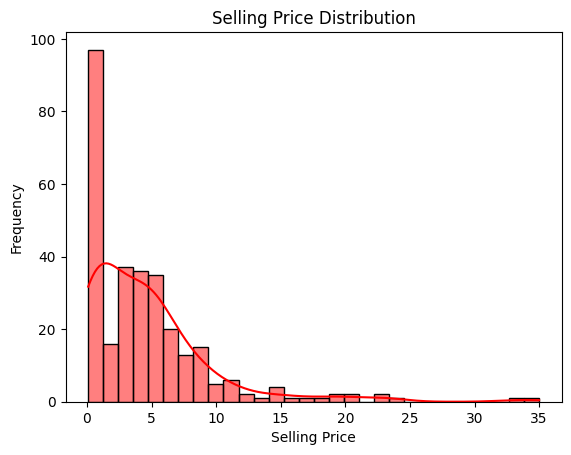

In [39]:
sns.histplot(df['Selling_Price'],kde=True,bins=30,color='red')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

2. Count Plots for Categorical Data

/tmp/ipython-input-47-1687650374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_Type',data=df,palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

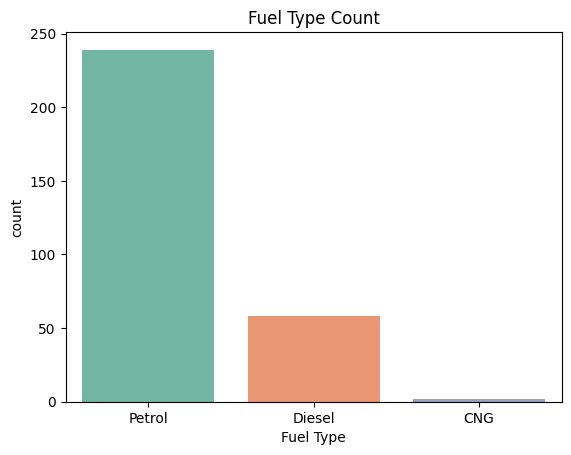

In [47]:
sns.countplot(x='Fuel_Type',data=df,palette='Set2')
plt.title('Fuel Type Count')
plt.xlabel('Fuel Type')
plt.ylabel('count')
plt.show

/tmp/ipython-input-48-389088487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seller_Type',data=df,palette='Set1')


<function matplotlib.pyplot.show(close=None, block=None)>

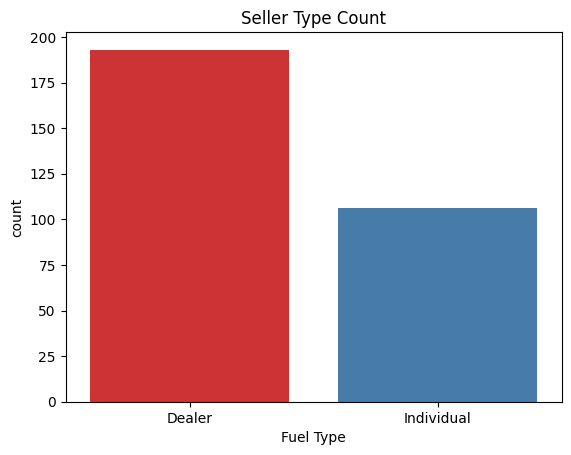

In [48]:
sns.countplot(x='Seller_Type',data=df,palette='Set1')
plt.title('Seller Type Count')
plt.xlabel('Fuel Type')
plt.ylabel('count')
plt.show

 3.Box Plots (Categorical vs Numeric)

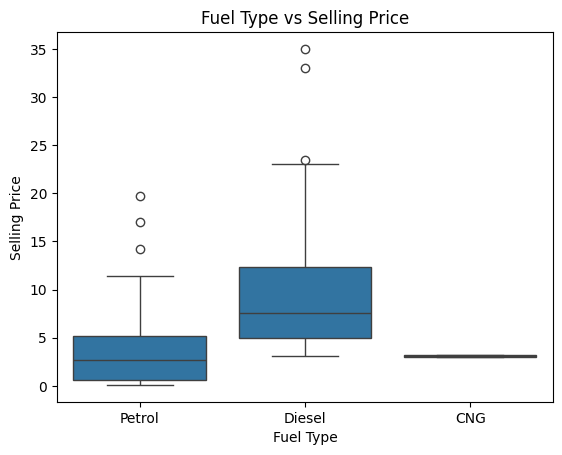

In [49]:
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=df)
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

4. Price vs Present Price / Year(Scatter Plot: Present Price vs Selling Price)

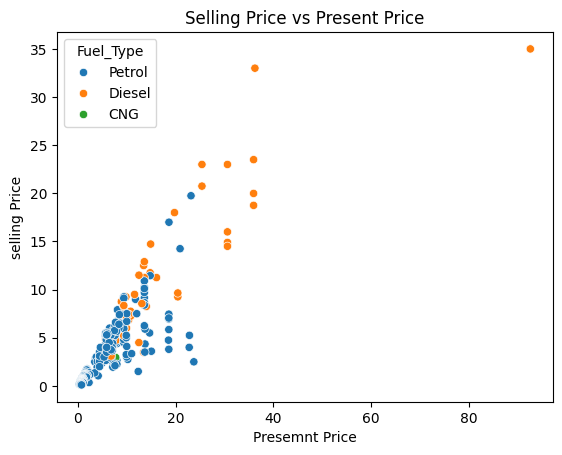

In [57]:
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title('Selling Price vs Present Price')
plt.xlabel('Presemnt Price')
plt.ylabel('selling Price')
plt.show()

5. Correlation Heatmap
Shows how strongly numerical features are related to each other.

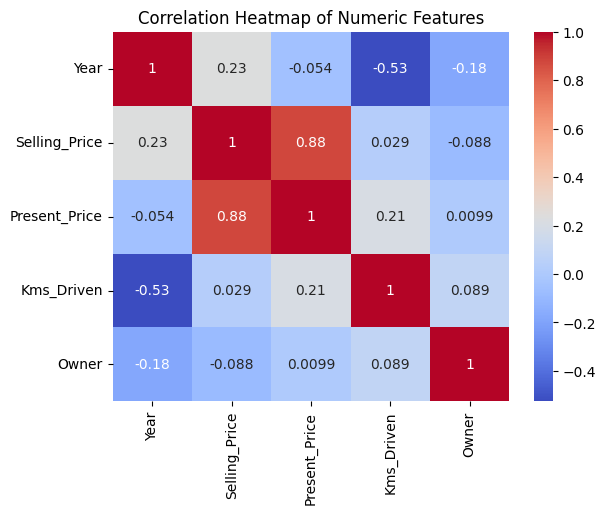

In [60]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [61]:
print(df.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


 Predictive Modeling Prep

In [62]:
#  encode categorical variables
df_model = pd.get_dummies(df, drop_first=True)

# Feature and target
X = df_model.drop('Selling_Price', axis=1)
y = df_model['Selling_Price']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#evaluation
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.33909650643975764


In [63]:
df.to_csv('car_Dekho_DA_cleaned.csv')